# binary

In [ ]:
import re
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the text file
# with open("c:/Users/anany/Desktop/OSA/sleep_stage_paper_implementation/binary_clustering.txt", "r") as file:
#     data = file.read()

# Extract condition blocks
# conditions = re.split(r"binary \d+", data)

# Extract feature importance for each condition
condition_names = ["SEVERE", "MODERATE", "MILD"]
condition_data = [
    {
        "D5_percentile_25": 0.0616,
        "D5_percentile_75": 0.0414,
        "A5_percentile_75": 0.0361,
        "D1_percentile_75": 0.0340,
        "A5_percentile_25": 0.0331,
        "D4_ar_coeff_2": 0.0331,
        "D1_energy": 0.0326,
        "D1_hjorth_activity": 0.0326,
        "D1_std": 0.0325,
        "D4_percentile_25": 0.0305,
        "D2_renyi_entropy": 0.0265,
        "D4_hjorth_complexity": 0.0260,
        "D3_percentage_energy": 0.0255,
        "D1_percentile_25": 0.0254,
        "D2_percentile_75": 0.0244,
        "D3_percentile_75": 0.0241,
        "D2_tsallis_entropy": 0.0240,
        "D5_range": 0.0230,
        "D2_hjorth_mobility": 0.0221,
        "D4_hjorth_mobility": 0.0221
    },
    {
        "A5_percentile_75": 0.2810,
        "A5_percentile_25": 0.2757,
        "D5_percentile_25": 0.2640,
        "D5_percentile_75": 0.2615,
        "D5_std": 0.2549,
        "D5_energy": 0.2548,
        "D5_hjorth_activity": 0.2548,
        "D4_energy": 0.2490,
        "D4_hjorth_activity": 0.2486,
        "D4_std": 0.2484,
        "D4_percentile_25": 0.2384,
        "D4_percentile_75": 0.2367,
        "D3_energy": 0.2072,
        "D3_hjorth_activity": 0.2065,
        "D3_std": 0.2065,
        "A5_energy": 0.1991,
        "A5_std": 0.1961,
        "A5_hjorth_activity": 0.1937,
        "D3_percentile_75": 0.1562,
        "D3_percentile_25": 0.1558
    },
    {
        "D2_std": 0.1788,
        "D2_hjorth_activity": 0.1786,
        "D2_range": 0.1779,
        "D2_energy": 0.1747,
        "D4_percentile_75": 0.1580,
        "D5_percentile_25": 0.1517,
        "D4_percentile_25": 0.1492,
        "D5_percentile_75": 0.1486,
        "D3_energy": 0.1468,
        "D4_energy": 0.1430,
        "D4_hjorth_activity": 0.1422,
        "D4_std": 0.1418,
        "D3_hjorth_activity": 0.1403,
        "D3_std": 0.1399,
        "D2_renyi_entropy": 0.1302,
        "D2_tsallis_entropy": 0.1295,
        "D5_range": 0.1280,
        "D3_tsallis_entropy": 0.1272,
        "D5_hjorth_activity": 0.1237,
        "D5_energy": 0.1237
    }
]

# for condition in conditions:
#     matches = re.findall(r"(\w+): ([0-9.]+)", condition)
#     condition_data.append({feature: float(score) for feature, score in matches})

# Create a DataFrame where rows are conditions and columns are features
df = pd.DataFrame(condition_data, index=condition_names).fillna(0)

In [3]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the DataFrame
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=condition_names)

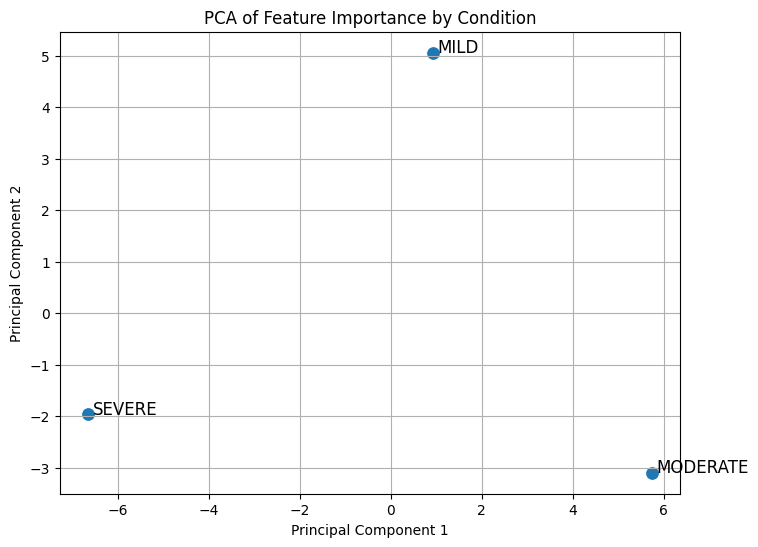

In [4]:
# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca, s=100)

# Annotate points with condition names
for i, condition in enumerate(df_pca.index):
    plt.text(df_pca.iloc[i, 0] + 0.1, df_pca.iloc[i, 1], condition, fontsize=12)

plt.title("PCA of Feature Importance by Condition")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

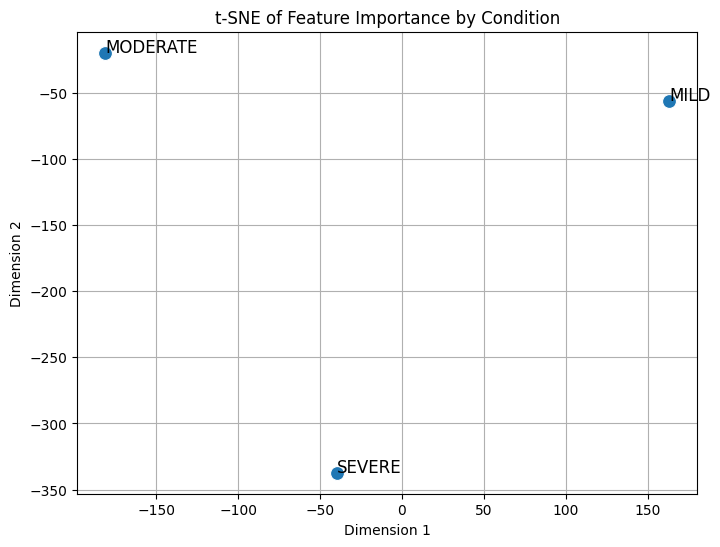

In [6]:
from sklearn.manifold import TSNE

# Apply t-SNE with adjusted perplexity
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Add t-SNE results to the DataFrame
df_tsne = pd.DataFrame(tsne_result, columns=["Dim1", "Dim2"], index=condition_names)

# Scatter plot of t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Dim1", y="Dim2", data=df_tsne, s=100)

# Annotate points with condition names
for i, condition in enumerate(df_tsne.index):
    plt.text(df_tsne.iloc[i, 0] + 0.1, df_tsne.iloc[i, 1], condition, fontsize=12)

plt.title("t-SNE of Feature Importance by Condition")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

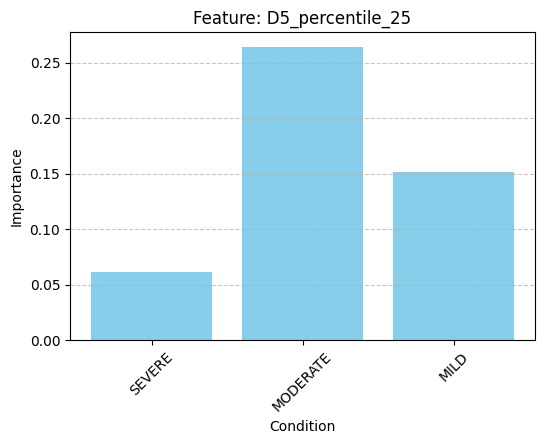

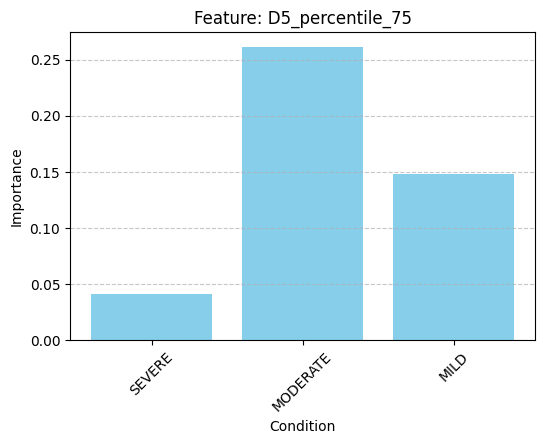

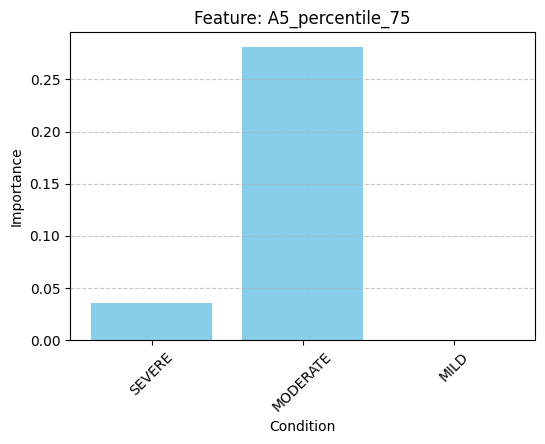

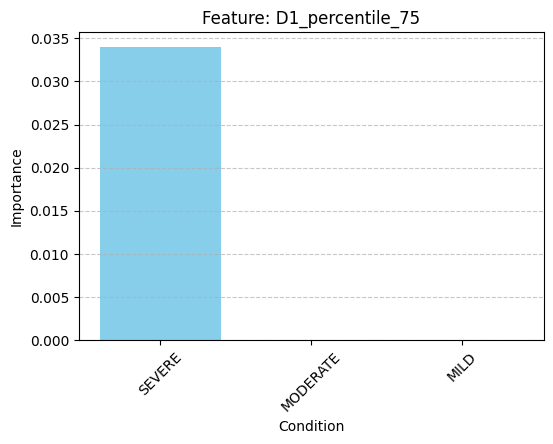

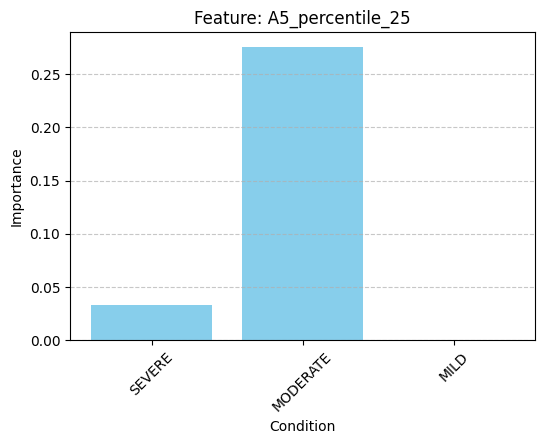

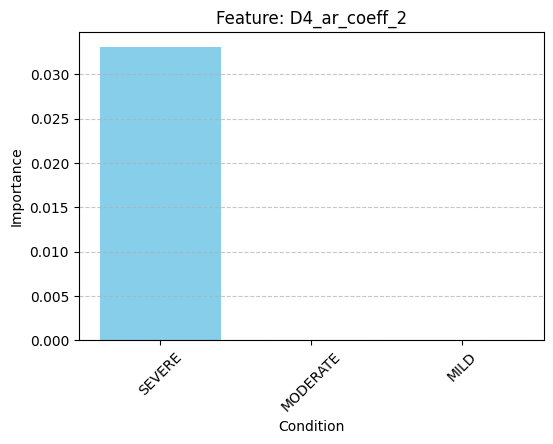

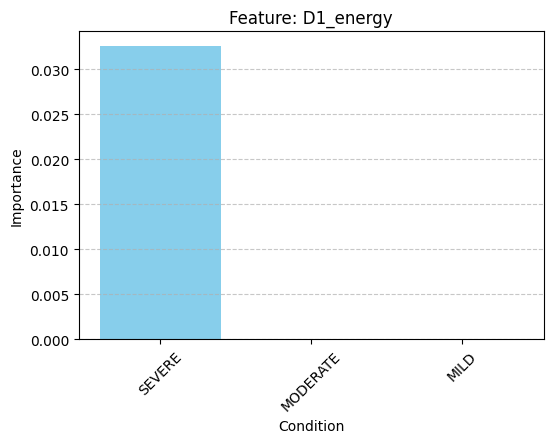

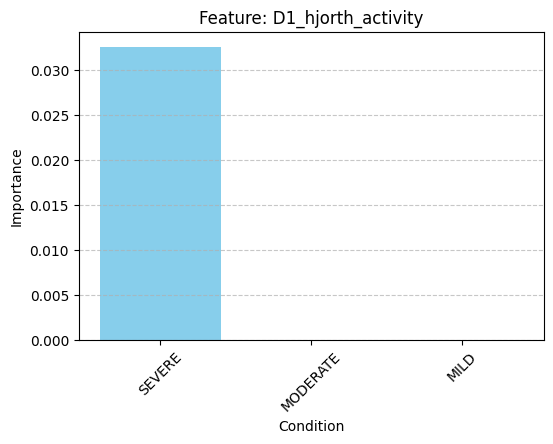

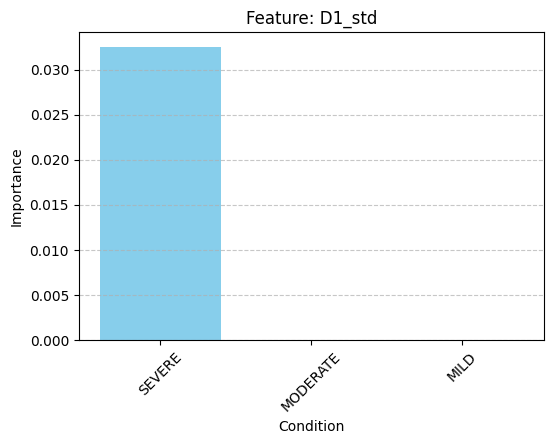

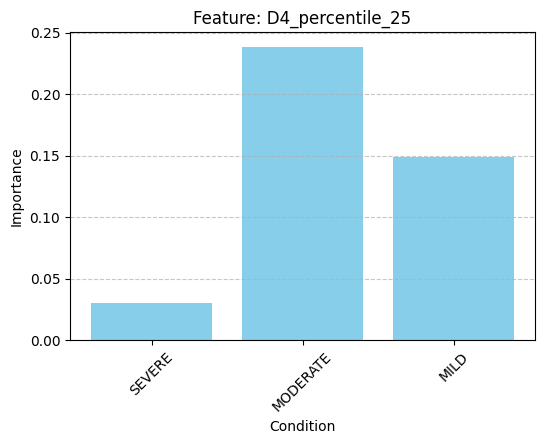

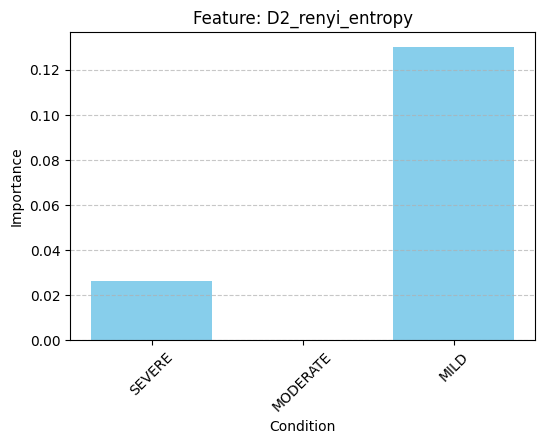

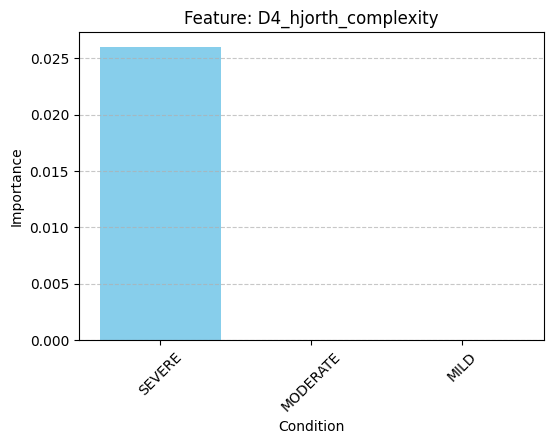

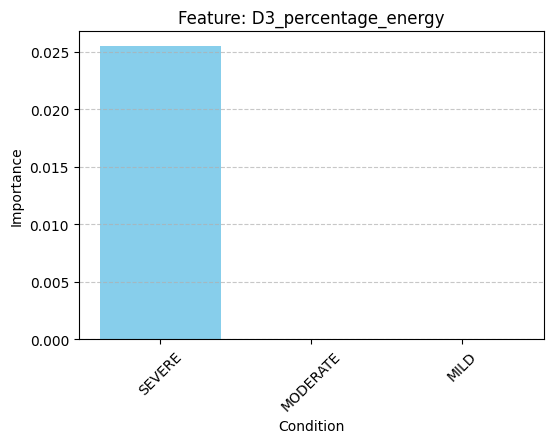

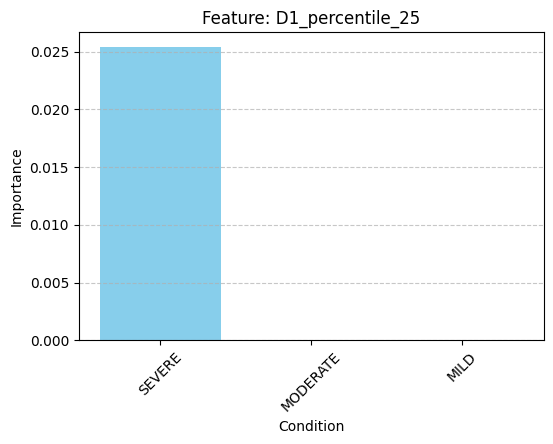

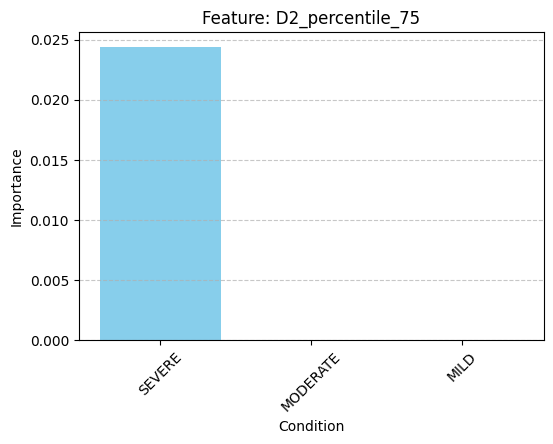

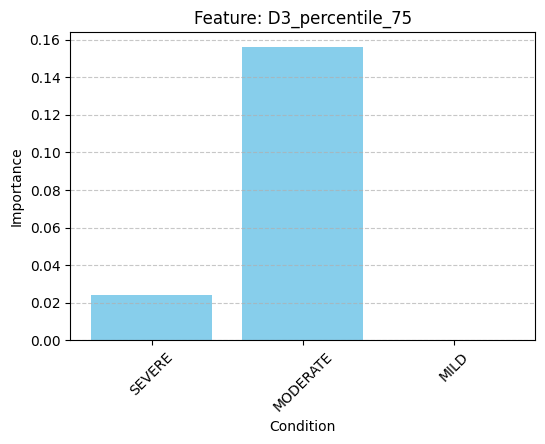

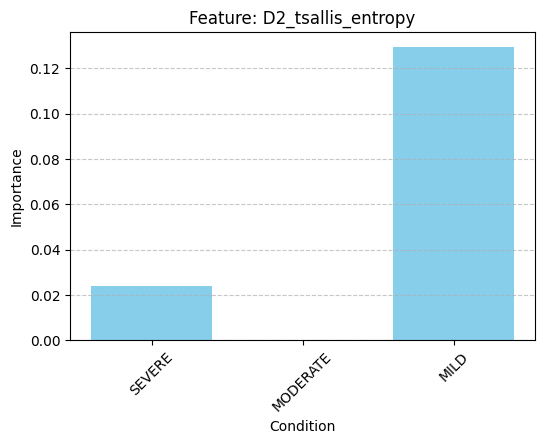

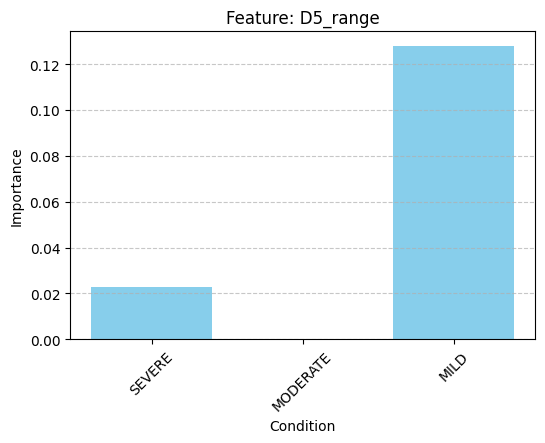

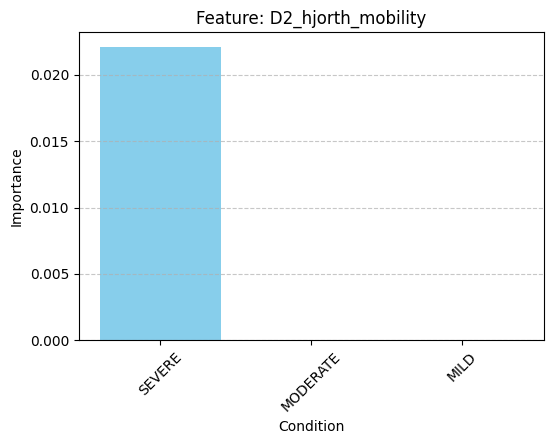

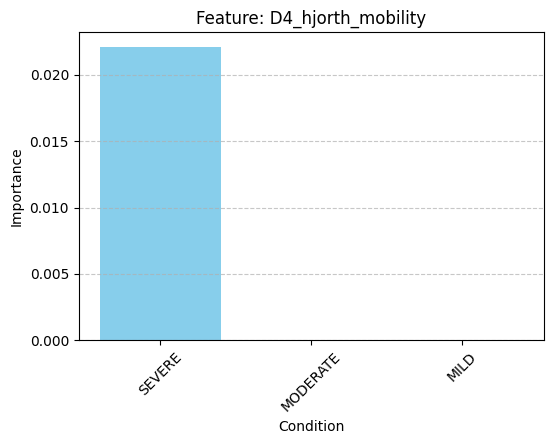

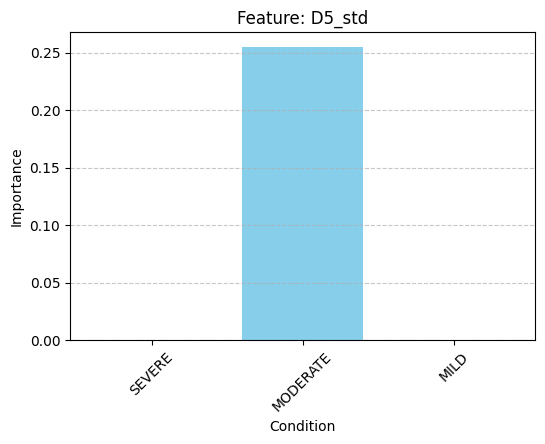

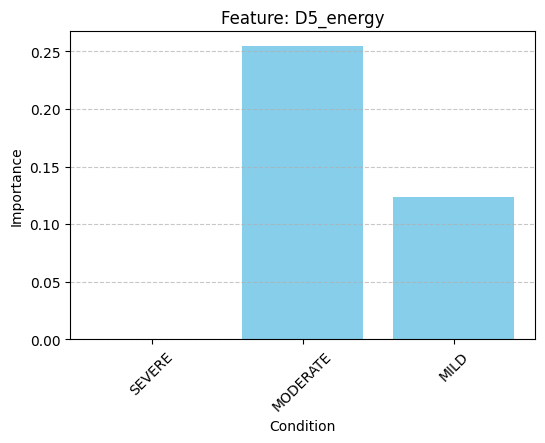

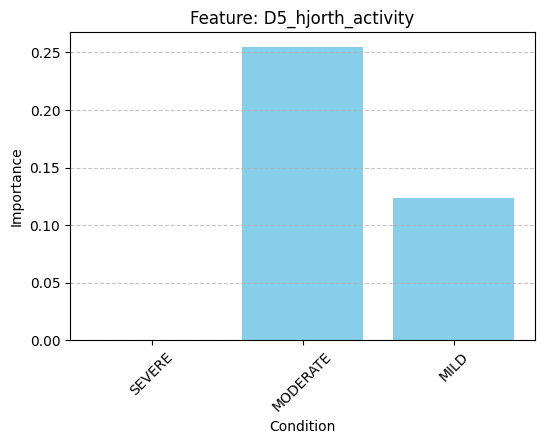

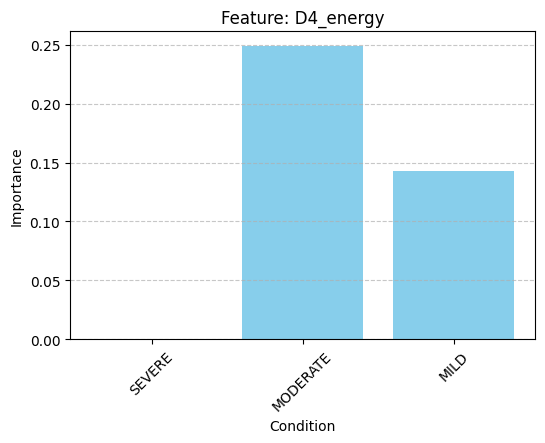

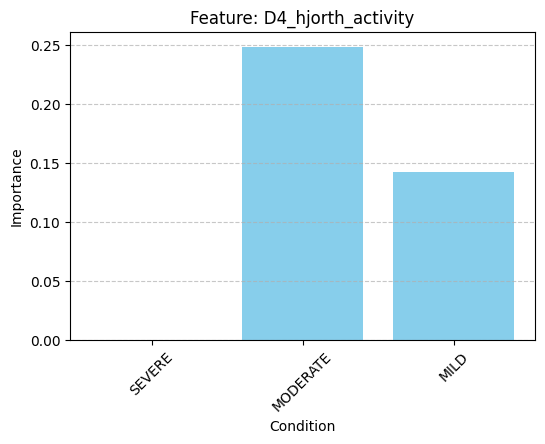

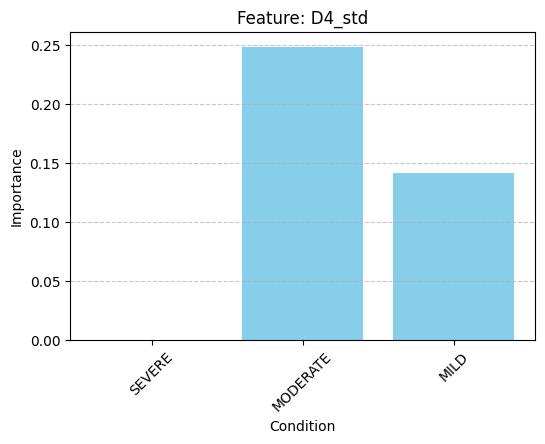

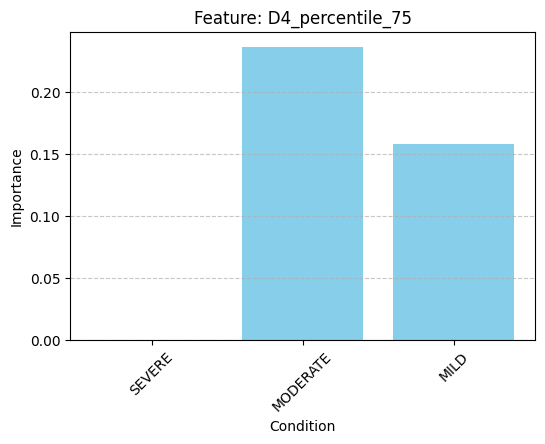

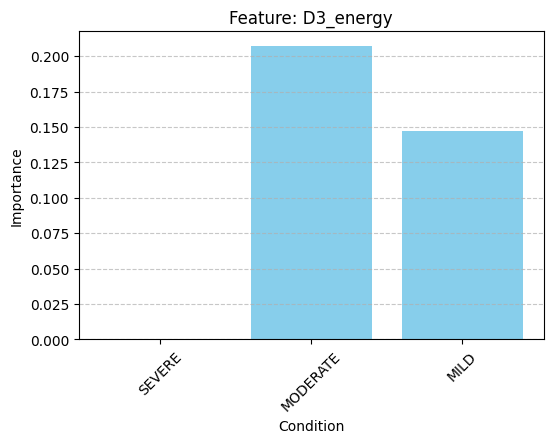

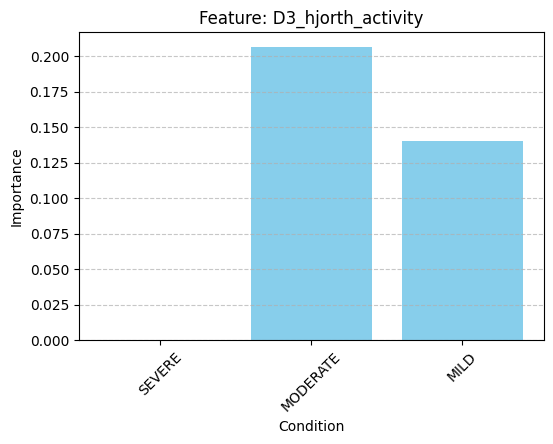

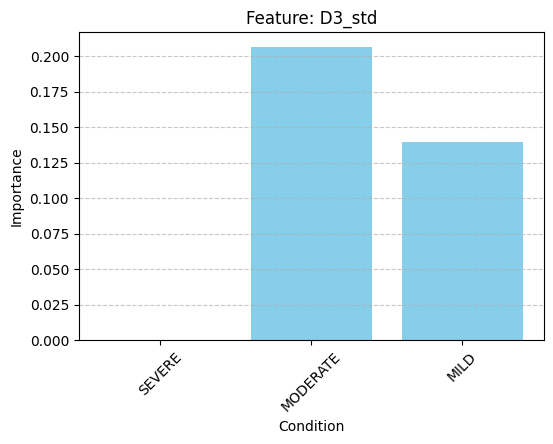

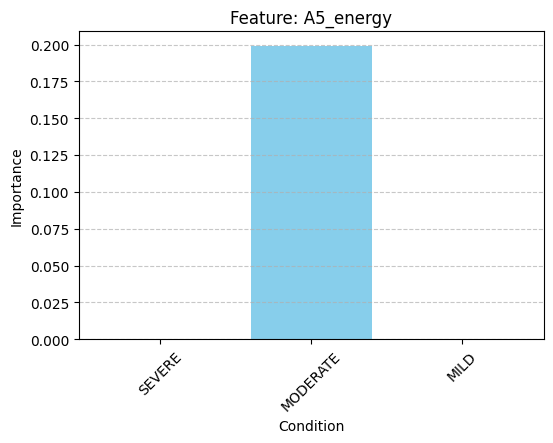

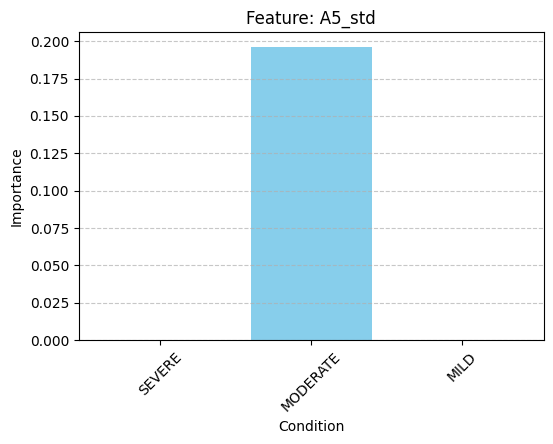

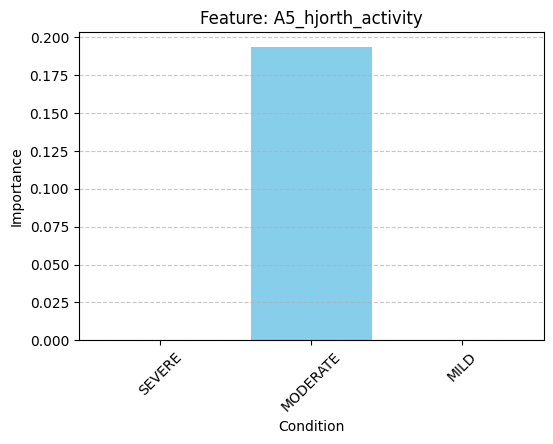

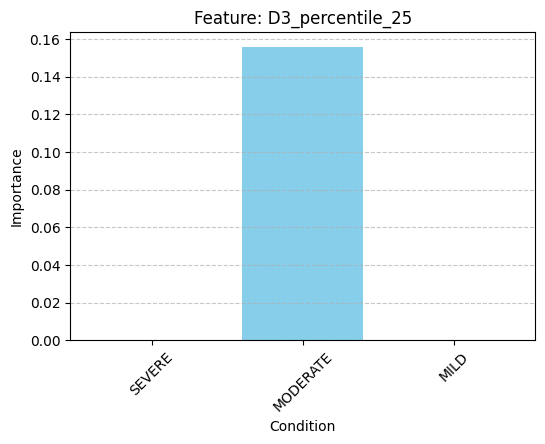

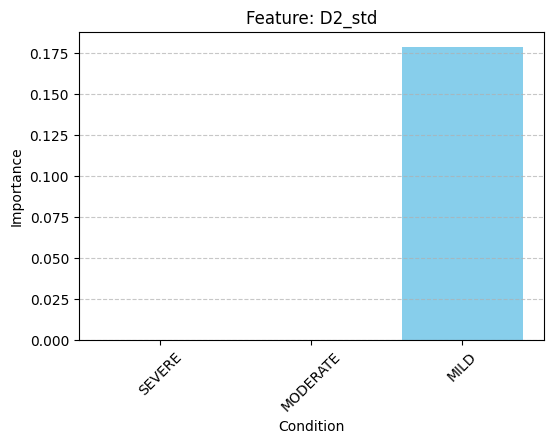

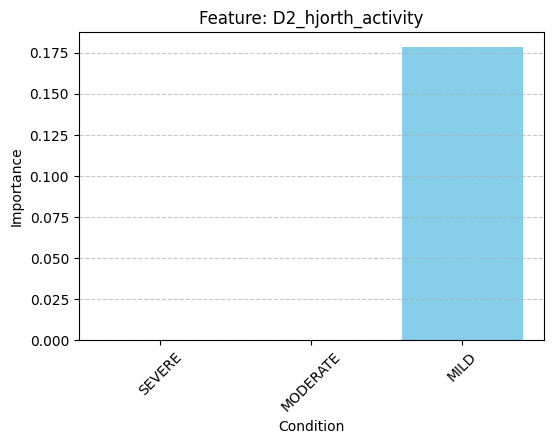

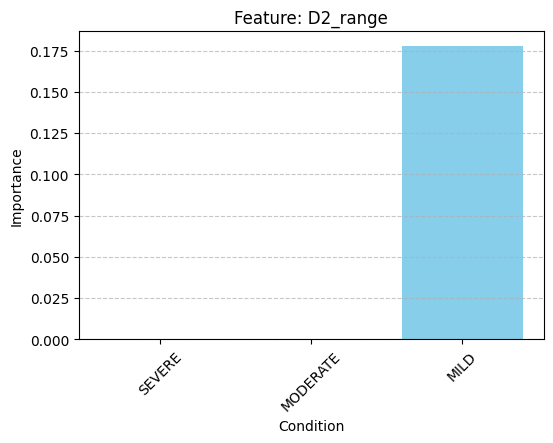

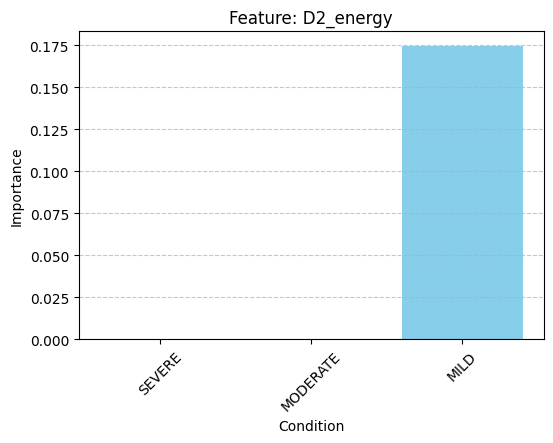

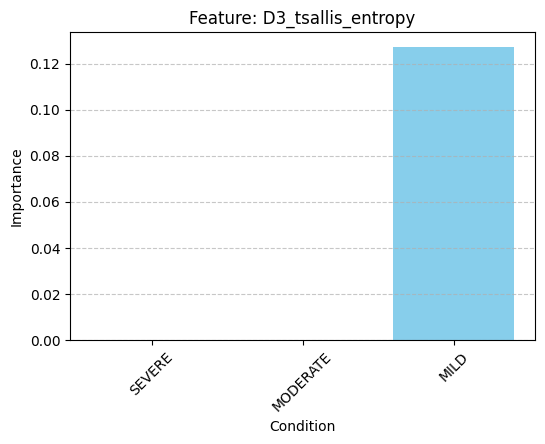

In [8]:
# Iterate through each feature in the DataFrame
for feature in df.columns:
    plt.figure(figsize=(6, 4))
    plt.bar(df.index, df[feature], color="skyblue")
    plt.title(f"Feature: {feature}")
    plt.xlabel("Condition")
    plt.ylabel("Importance")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()